# Exploratory Data Analysis (EDA) on Cropped Face Dataset

In this notebook, we will explore the **cropped face images** from the previous preprocessing step to understand the dataset characteristics and prepare it for model training.

## Objectives:

1. **Distribution of Male and Female Images**
   - Visualize counts using **Bar Chart**  
   - Visualize proportions using **Pie Chart**

2. **Distribution of Image Sizes (Width & Height)**
   - Analyze using **Histogram**  
   - Analyze using **Box Plot**  
   - Split distributions by **Gender**

3. **Decide Target Image Dimensions for Resizing**
   - Use insights from the above charts to determine standard width & height for the model input.

4. **Filter Out Very Small Images**
   - Identify and remove images that are too small to be useful for training.


# 📦 Import Required Libraries

In [1]:
import numpy as np               # For numerical operations (arrays, matrices)
import pandas as pd              # For data manipulation and statistics

# Visualization libraries
import matplotlib.pyplot as plt  # For plotting charts
import seaborn as sns            # For enhanced visualization (histograms, boxplots)

# Computer vision library
import cv2                       # For image reading and processing

# File handling
from glob import glob            # To extract image file paths from dataset directories


# 📂 Load Cropped Image Paths

In [2]:

# Extract all female and male image paths from the cropped dataset
fpath = glob('./data/crop_data/female/*.jpg')
mpath = glob('./data/crop_data/male/*.jpg')

# Display basic information
print(f"✅ Number of female images: {len(fpath)}")
print(f"✅ Number of male images: {len(mpath)}")


✅ Number of female images: 2704
✅ Number of male images: 2039


# 🗂 Create DataFrame for Dataset

In [3]:
# Female images DataFrame
df_female = pd.DataFrame(fpath, columns=['filepath'])
df_female['gender'] = 'female'

# Male images DataFrame
df_male = pd.DataFrame(mpath, columns=['filepath'])
df_male['gender'] = 'male'

# Combine male and female into a single DataFrame
df = pd.concat([df_female, df_male], axis=0).reset_index(drop=True)

# Display first few rows
df.head()


,filepath,gender
0,./data/crop_data/female\female_0.jpg,female
1,./data/crop_data/female\female_1.jpg,female
2,./data/crop_data/female\female_100.jpg,female
3,./data/crop_data/female\female_1002.jpg,female
4,./data/crop_data/female\female_1005.jpg,female


In [4]:
df.tail()

,filepath,gender
4738,./data/crop_data/male\male_994.jpg,male
4739,./data/crop_data/male\male_996.jpg,male
4740,./data/crop_data/male\male_997.jpg,male
4741,./data/crop_data/male\male_998.jpg,male
4742,./data/crop_data/male\male_999.jpg,male


In [5]:
df.shape

(4743, 2)

In [6]:
# it will take each image path
# then return width of the image
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]


In [7]:
df['dimension'] = df['filepath'].apply(get_size) # store dimension of image in this columns

In [8]:
df.head()

,filepath,gender,dimension
0,./data/crop_data/female\female_0.jpg,female,273
1,./data/crop_data/female\female_1.jpg,female,273
2,./data/crop_data/female\female_100.jpg,female,122
3,./data/crop_data/female\female_1002.jpg,female,122
4,./data/crop_data/female\female_1005.jpg,female,182


In [9]:
# ==========================
# 📊 Gender Distribution Table
# ==========================

dist_gender = df['gender'].value_counts().reset_index()
dist_gender.columns = ['Gender', 'Count']
dist_gender['Percentage'] = (dist_gender['Count'] / dist_gender['Count'].sum() * 100).round(2)

dist_gender


,Gender,Count,Percentage
0,female,2704,57.01
1,male,2039,42.99


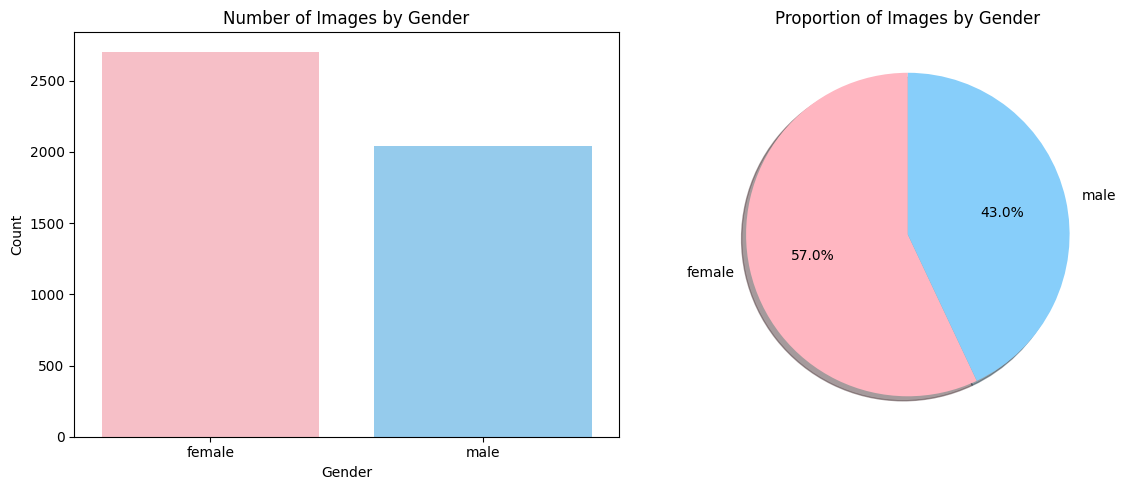

In [10]:
# ==========================
# 📊 Gender Distribution - Bar & Pie Side by Side
# ==========================

# Prepare figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Bar Chart with two colors, no extra legend
sns.barplot(
    x='Gender', y='Count', data=dist_gender, 
    hue='Gender', dodge=False, 
    palette=['#FFB6C1','#87CEFA'], ax=ax[0]
)
ax[0].set_title('Number of Images by Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')

# Remove legend safely
legend = ax[0].get_legend()
if legend is not None:
    legend.remove()

# Pie Chart
ax[1].pie(
    dist_gender['Count'], labels=dist_gender['Gender'], 
    autopct='%1.1f%%', colors=['#FFB6C1','#87CEFA'], 
    startangle=90, shadow=True
)
ax[1].set_title('Proportion of Images by Gender')

plt.tight_layout()
plt.show()



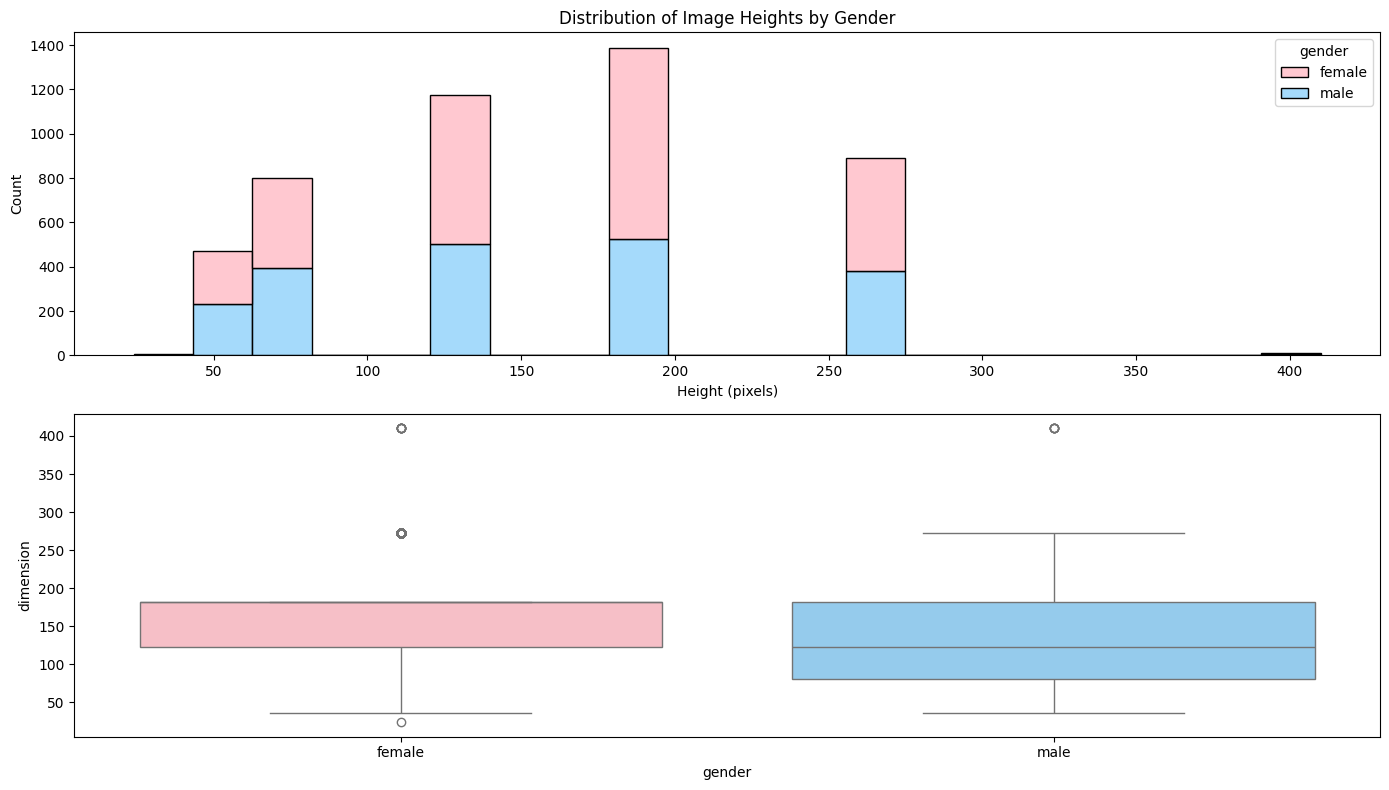

In [12]:
# ==========================
# 📏 Image Height Distribution by Gender
# ==========================

plt.figure(figsize=(14,8))

# Histogram - Dimension (height)
plt.subplot(2,1,1)
sns.histplot(df, x='dimension', hue='gender', multiple='stack', 
             palette=['#FFB6C1','#87CEFA'], bins=20)
plt.title('Distribution of Image Heights by Gender')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')

# Boxplot - Dimension (height) with manual colors to avoid warning
plt.subplot(2,1,2)
sns.boxplot(x='gender', y='dimension', data=df, hue='gender', dodge=False,
            palette=['#FFB6C1','#87CEFA'])

plt.tight_layout()
plt.show()


## 📝 Insights from Image Size Analysis

1. **Gender Distribution:**  
   - The dataset is almost equally balanced between male and female images.

2. **Image Dimensions:**  
   - Most images have a dimension (height) **greater than 60 pixels**.  
   - Female images tend to have higher resolution (HD) compared to male images.

---

## 🎯 Preprocessing Decision

- **Filter Images:** Only consider images with dimensions **greater than 60 pixels**.  
- **Resize Standardization:** All remaining images will be resized to **100 x 100 pixels**,  
  ensuring consistency for model training.


In [13]:
# ==========================
# ⚡ Filter Images with Dimension > 60
# ==========================

# Keep only images with dimension (height) greater than 60 pixels
df_filter = df.query('dimension > 60').reset_index(drop=True)

# Display the shape of filtered dataset
print(f"✅ Number of images after filtering: {df_filter.shape[0]}")
print(f"✅ Dataset shape (rows, columns): {df_filter.shape}")


✅ Number of images after filtering: 4265
✅ Dataset shape (rows, columns): (4265, 3)


In [15]:
dist_gender_filter = df_filter['gender'].value_counts().reset_index()
dist_gender_filter.columns = ['Gender', 'Count']
dist_gender_filter['Percentage'] = (dist_gender_filter['Count'] / dist_gender_filter['Count'].sum() * 100).round(2)
dist_gender_filter

,Gender,Count,Percentage
0,female,2458,57.63
1,male,1807,42.37


# 🏗 Structuring Images (Grayscale, Resize, Flatten)

In this step, we transform each filtered image into a **standardized format** suitable for model training:

1. **Read Image:**  
   Load the image from disk in BGR format using OpenCV.

2. **Convert to Grayscale:**  
   Reduce computational complexity by converting to single-channel grayscale.

3. **Resize to 100 x 100 Pixels:**  
   - If the original image is larger than 100 pixels, we **shrink** using `INTER_AREA`.  
   - If smaller, we **enlarge** using `INTER_CUBIC`.

4. **Flatten Image:**  
   Convert the 2D 100x100 grayscale image into a **1D array of 10,000 elements**.  
   This allows the image to be used as a **feature vector** for machine learning models.

✅ Result: Every image is now in a **uniform, fixed-size format**, ready for feeding into the recognition model.

In [16]:
def structuring(path):
    """
    Reads an image, converts to grayscale, resizes to 100x100 pixels,
    and flattens it into a 1D array.

    Args:
        path (str): Path to the image file

    Returns:
        np.ndarray or None: Flattened grayscale image array (10000,)
                            Returns None if image cannot be processed
    """
    try:
        # Step 1: Read image (BGR)
        img = cv2.imread(path)
        
        # Step 2: Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Step 3: Resize to 100 x 100
        size = gray.shape[0]
        if size >= 100:
            # Shrink using INTER_AREA
            gray_resize = cv2.resize(gray, (100, 100), interpolation=cv2.INTER_AREA)
        else:
            # Enlarge using INTER_CUBIC
            gray_resize = cv2.resize(gray, (100, 100), interpolation=cv2.INTER_CUBIC)
        
        # Step 4: Flatten image into 1D array (10000,)
        flatten_image = gray_resize.flatten()
        return flatten_image
    
    except Exception as e:
        print(f"⚠️ Unable to process image: {path} - {e}")
        return None


# ⚡ Apply Structuring Function to Filtered Images

In [17]:
# Convert all filtered images into 100x100 flattened grayscale arrays
df_filter['data'] = df_filter['filepath'].apply(structuring)

# Display the first few rows to inspect
df_filter.head()


,filepath,gender,dimension,data
0,./data/crop_data/female\female_0.jpg,female,273,"[185, 182, 183, 185, 175, 180, 188, 183, 211, ..."
1,./data/crop_data/female\female_1.jpg,female,273,"[233, 234, 236, 236, 206, 179, 123, 67, 30, 43..."
2,./data/crop_data/female\female_100.jpg,female,122,"[50, 49, 35, 34, 42, 40, 36, 40, 68, 60, 46, 4..."
3,./data/crop_data/female\female_1002.jpg,female,122,"[130, 119, 117, 98, 87, 92, 92, 110, 154, 161,..."
4,./data/crop_data/female\female_1005.jpg,female,182,"[234, 234, 233, 229, 231, 204, 126, 106, 81, 5..."


In [18]:
# ==========================
# 🖼 Expand Flattened Images into Individual Pixels
# ==========================

# Convert the 'data' column (flattened arrays) into separate columns
data = df_filter['data'].apply(pd.Series)

# Rename columns as pixel_0, pixel_1, ..., pixel_9999
data.columns = [f"pixel_{i}" for i in data.columns]

# Display first few rows
data.head()


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,185,182,183,185,175,180,188,183,211,215,...,109,111,115,117,121,116,118,118,117,111
1,233,234,236,236,206,179,123,67,30,43,...,23,19,19,17,21,27,28,28,37,38
2,50,49,35,34,42,40,36,40,68,60,...,208,227,228,235,237,231,222,215,212,210
3,130,119,117,98,87,92,92,110,154,161,...,153,104,62,63,66,80,90,100,107,112
4,234,234,233,229,231,204,126,106,81,56,...,242,242,237,237,239,237,237,240,239,240


# ⚡ Data Normalization


### Description:
Data normalization is the process of **scaling pixel values** so that they lie within a standard range, usually between 0 and 1.  
In our dataset, the pixel values currently range from 0 to 255, representing grayscale intensity.

### Purpose:
1. **Improve Model Performance:** Neural networks and many machine learning algorithms converge faster and perform better when features are scaled.  
2. **Prevent Dominance of Large Values:** Normalization ensures that all pixels contribute equally to the learning process.  
3. **Maintain Consistency:** Standardizes the input for all images, making the training process stable and more reliable.

✅ After normalization, the dataset will be ready for feeding into machine learning models for face recognition.


---

## 🔢 Normalization Implementation

Since we are working with 8-bit grayscale images, each pixel has an intensity value between **0 and 255**.  
To normalize, we simply **divide each pixel by 255**, transforming values into the range **[0, 1]**.  

This makes the dataset ready for training machine learning models.


In [19]:
# Normalize pixel values (0-255 → 0-1)
data = data / 255.0  

# Add gender column back for supervised learning
data['gender'] = df_filter['gender']

# Preview the normalized dataset
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294,female
1,0.913725,0.917647,0.925490,0.925490,0.807843,0.701961,0.482353,0.262745,0.117647,0.168627,...,0.074510,0.074510,0.066667,0.082353,0.105882,0.109804,0.109804,0.145098,0.149020,female
2,0.196078,0.192157,0.137255,0.133333,0.164706,0.156863,0.141176,0.156863,0.266667,0.235294,...,0.890196,0.894118,0.921569,0.929412,0.905882,0.870588,0.843137,0.831373,0.823529,female
3,0.509804,0.466667,0.458824,0.384314,0.341176,0.360784,0.360784,0.431373,0.603922,0.631373,...,0.407843,0.243137,0.247059,0.258824,0.313725,0.352941,0.392157,0.419608,0.439216,female
4,0.917647,0.917647,0.913725,0.898039,0.905882,0.800000,0.494118,0.415686,0.317647,0.219608,...,0.949020,0.929412,0.929412,0.937255,0.929412,0.929412,0.941176,0.937255,0.941176,female


## 🧹 Null Value Check

Before moving forward, it is important to verify that there are no missing values (`NaN`) in the dataset.  
This ensures data consistency and avoids errors during model training.


In [20]:
# Count total missing values across the dataset
missing_values = data.isnull().sum().sum()
print("Total Missing Values:", missing_values)


Total Missing Values: 0


## 🧹 Removing Missing Values

Although we checked for null values earlier, as a precaution, we remove any rows that contain missing values.  
This guarantees that the dataset is clean before training.


In [21]:
# Drop rows with missing values (if any)
data.dropna(inplace=True)

print("Dataset shape after removing missing values:", data.shape)

Dataset shape after removing missing values: (4265, 10001)


## 💾 Save the Processed Data

We will save the cleaned and structured dataset using **Pickle**.  
This allows us to reuse the preprocessed data in future experiments without repeating all preprocessing steps.


In [22]:
import pickle

# Save processed dataset
pickle.dump(data, open('./data/data_images_100_100.pickle', mode='wb'))

print("✅ Data saved successfully at './data/data_images_100_100.pickle'")

✅ Data saved successfully at './data/data_images_100_100.pickle'


# 📝 Conclusion

### Key Insights:
1. **Gender Distribution**  
   - The dataset has an almost equal number of male and female images.

2. **Image Dimensions**  
   - Most images have a dimension greater than 60 pixels.  
   - Female images tend to have higher resolution (HD) compared to male images.

3. **Image Preprocessing**  
   - All images were converted into **grayscale**, resized to **100×100**, and flattened into vectors of size `1 × 10,000`.  
   - This ensures a consistent input size for future machine learning tasks.

4. **Data Normalization**  
   - Pixel values were normalized to the range **[0,1]** by dividing by 255.  
   - This step is crucial for stabilizing and improving model training.

5. **Data Storage**  
   - The processed dataset was saved into a **pickle file** (`data_images_100_100.pickle`) for easy reuse in future experiments.

---

✅ With these steps, the dataset is **clean, structured, and ready** for machine learning modeling (e.g., gender classification using image data).


# 🔜 Next Notebook: 03_FRM_feature_extraction_eigen_face


In the next notebook, we will:
- Perform **Feature Extraction** using the **Eigenfaces approach** (PCA on image data).  
- Reduce the **high-dimensional image space (10,000 pixels)** into a smaller set of **principal components** that capture the most important facial features.  
- Visualize the **Eigenfaces** and prepare the features for model training.